<div style="background-color: dark; padding: 20px">
<h1 style="color: orange; fontweight: bold">Réalisez une étude de santé publique avec Python</h1>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: black; fontweight: bold'><b>Objectifs de la mission</b>:</h3>
<p style='color: black; fontweight: bold'>Réaliser une étude de grande ampleur sur le thème de l’alimentation et de la sous-nutrition dans le monde pour le compte de la Food and Agriculture Organization of the United Nations (FAO).</p>
</div>

<div style="background-color: RGB(0,150,250);">
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as pe

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher le type de l'objet
type(population)

pandas.core.frame.DataFrame

In [4]:
# Afficher les dimensions du dataframe
# population.shape # => renvoie un tuple : (nombre de lignes, nombre de colonnes)
# OU
print("Le dataframe contient {} ligne(s)".format(population.shape[0]))
print("Le dataframe contient {} colonne(s)".format(population.shape[1]))

Le dataframe contient 1416 ligne(s)
Le dataframe contient 3 colonne(s)


In [5]:
# Visualiser davantage de lignes du dataframe, en l'occurrence jusqu'à 1600
pd.set_option('display.max_rows', 1600)

In [6]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs non nulles présentes dans chacune des colonnes
print(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
None


In [7]:
#Affichage des 5 premières lignes du dataframe
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [8]:
#Nous allons harmoniser les unités pour passer d'une population exprimée en milliers d'habitants à une population exprimée en habitants
#Multiplication de la colonne valeur par 1000 
population["Valeur"] = population["Valeur"]*1000
population["Valeur"] = population["Valeur"].astype(int) # transformation du type pour avoir un entier au lieu d'un décimal
population["Valeur"].head()

0    32269589
1    33370794
2    34413603
3    35383032
4    36296113
Name: Valeur, dtype: int32

In [9]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [10]:
#Affichage des 5 premières lignes du dataframe pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [11]:
#Afficher les dimensions du dataframe (cette fois d'une manière différente)
nb_rows = dispo_alimentaire.shape[0]
nb_columns = dispo_alimentaire.shape[1]
print('Le dataframe contient',nb_rows,'lignes et',nb_columns,'colonnes')

Le dataframe contient 15605 lignes et 18 colonnes


In [12]:
#Consulter le nom des colonnes
dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [13]:
# Affichage du nombre de valeurs non nulles et du type de données de chaque colonne
# la méthode .info() renvoie également le nombre de lignes du dataframe et le nombre de colonnes
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [14]:
# Affichage des 5 premières lignes du dataframe
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [15]:
# Remplacement des valeurs NaN du dataset par des 0
dispo_alimentaire.replace(np.nan, 0, inplace=True)
dispo_alimentaire.head(1) # afficher la première ligne pour s'assurer que le remplacement a été effectué

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.2,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0


In [16]:
# Multiplication de toutes les lignes contenant des milliers de tonnes en Kg
list_of_columns = ['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure',
                    'Exportations - Quantité','Importations - Quantité','Nourriture',
                    'Pertes', 'Production', 'Semences','Traitement', 'Variation de stock']
dispo_alimentaire[list_of_columns] = dispo_alimentaire[list_of_columns]*1000000

In [17]:
# Affichage des 5 premières lignes du df
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [18]:
# Afficher les dimensions du dataframe
print("Le dataframe contient {} ligne(s)".format(aide_alimentaire.shape[0]))
print("Le dataframe contient {} colonne(s)".format(aide_alimentaire.shape[1]))

Le dataframe contient 1475 ligne(s)
Le dataframe contient 4 colonne(s)


In [19]:
# Consulter le nom des colonnes
aide_alimentaire.columns

Index(['Pays bénéficiaire', 'Année', 'Produit', 'Valeur'], dtype='object')

In [20]:
# Affichage les 5 premières lignes du dataframe
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [21]:
# Changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [22]:
# Multiplication par 1000 de la colonne Valeur (exprimée en tonnes) pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000

In [23]:
# Affichage des 5 premières lignes du dataframe
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous_nutrition</h3>
</div>

In [24]:
# Afficher les dimensions du dataset
print("Le dataframe contient {} ligne(s)".format(sous_nutrition.shape[0]))
print("Le dataframe contient {} colonne(s)".format(sous_nutrition.shape[1]))

Le dataframe contient 1218 ligne(s)
Le dataframe contient 3 colonne(s)


In [25]:
# Consulter le nom des colonnes
sous_nutrition.columns

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [26]:
# Affichage du type des données et du nombre de valeurs nulles de chaque colonne 
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [27]:
# Afficher les 5 premières lignes du dataframe
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [28]:
# Changement du nom de la colonne Valeur par Habitants_en_sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'Habitants_en_sous_nutrition'}, inplace=True)
sous_nutrition.head()

,Zone,Année,Habitants_en_sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [29]:
# Comptage du nombre de valeurs NaN dans la colonne Habitants_en_sous_nutrition
# avec la méthode .isna() qui renvoie le booléen True s'il s'agit d'une valeur NaN - Ici .sum() permet le comptage car True == 1 et False == 0
sous_nutrition['Habitants_en_sous_nutrition'].isna().sum()

594

In [30]:
# Conversion des valeurs NaN en 0
sous_nutrition['Habitants_en_sous_nutrition'].fillna(0, inplace=True)

# On compte à nouveau le nombre de valeurs NaN, il ne devrait en rester aucune
sous_nutrition['Habitants_en_sous_nutrition'].isna().sum()

0

In [31]:
# Nombre de lignes qui contiennent, dans la colonne Habitants_en_sous_nutrition, la chaine de caractère "<0.1" 
# celle-ci cause une erreur lors de la conversion de la colonne en numérique
sous_nutrition.loc[sous_nutrition['Habitants_en_sous_nutrition'] == '<0.1'].shape[0]

120

In [32]:
# Remplacement des valeurs "<0.1" par des 0
sous_nutrition['Habitants_en_sous_nutrition'].replace('<0.1', 0, inplace=True)

In [33]:
# Conversion de la colonne sous-nutrition en numérique
sous_nutrition['Habitants_en_sous_nutrition'] = pd.to_numeric(sous_nutrition['Habitants_en_sous_nutrition'])
# Affichage du type de la colonne
sous_nutrition['Habitants_en_sous_nutrition'].dtypes

dtype('float64')

In [34]:
# Les données de la colonne Habitants_en_sous_nutrition sont exprimées en millions d'habitants.
# Multiplication de cette colonne par 1000000 pour que les valeurs soient exprimées en unités (en habitants)
sous_nutrition['Habitants_en_sous_nutrition'] = sous_nutrition['Habitants_en_sous_nutrition']*1000000

In [35]:
# Conversion de la colonne Habitants_en_sous_nutrition en type Integer
sous_nutrition['Habitants_en_sous_nutrition'] = sous_nutrition['Habitants_en_sous_nutrition'].astype(int)

In [36]:
#Afficher les 10 premières lignes du dataframe
sous_nutrition.head(10)

,Zone,Année,Habitants_en_sous_nutrition
0,Afghanistan,2012-2014,8600000
1,Afghanistan,2013-2015,8800000
2,Afghanistan,2014-2016,8900000
3,Afghanistan,2015-2017,9700000
4,Afghanistan,2016-2018,10500000
5,Afghanistan,2017-2019,11100000
6,Afrique du Sud,2012-2014,2200000
7,Afrique du Sud,2013-2015,2500000
8,Afrique du Sud,2014-2016,2800000
9,Afrique du Sud,2015-2017,3000000


In [37]:
# Changement des valeurs de la colonne 'Année' ; l'intervalle '2012-2014' devient '2013', l'intervalle '2013-2015' devient '2014', etc.
sous_nutrition['Année'].replace('2012-2014', '2013', inplace=True)
sous_nutrition['Année'].replace('2013-2015', '2014', inplace=True)
sous_nutrition['Année'].replace('2014-2016', '2015', inplace=True)
sous_nutrition['Année'].replace('2015-2017', '2016', inplace=True)
sous_nutrition['Année'].replace('2016-2018', '2017', inplace=True)
sous_nutrition['Année'].replace('2017-2019', '2018', inplace=True)

In [38]:
sous_nutrition.head(12)

,Zone,Année,Habitants_en_sous_nutrition
0,Afghanistan,2013,8600000
1,Afghanistan,2014,8800000
2,Afghanistan,2015,8900000
3,Afghanistan,2016,9700000
4,Afghanistan,2017,10500000
5,Afghanistan,2018,11100000
6,Afrique du Sud,2013,2200000
7,Afrique du Sud,2014,2500000
8,Afrique du Sud,2015,2800000
9,Afrique du Sud,2016,3000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Remplacement des noms de certains pays dans les différents dataframes</h3>
</div>

In [39]:
# Visualisation des noms de pays dans les différents dataframes

# On récupère les noms de pays de chaque dataframe dans une series
unique_zone_population = population['Zone'].unique()
unique_zone_dispo_alimentaire_pays = dispo_alimentaire['Zone'].unique()
unique_zone_aide_alimentaire_pays = aide_alimentaire['Zone'].unique()
unique_zone_sous_nutrition_pays = sous_nutrition['Zone'].unique()

# Création d'un dataframe à partir des 4 Series créées plus haut
noms_pays_4_dataframes = pd.DataFrame({
    'population_Zone': pd.Series(unique_zone_population),
    'dispo_alimentaire_Zone': pd.Series(unique_zone_dispo_alimentaire_pays),
    'aide_alimentaire_Zone': pd.Series(unique_zone_aide_alimentaire_pays),
    'sous_nutrition_Zone': pd.Series(unique_zone_sous_nutrition_pays)})


In [40]:
# Comparaison des noms de pays dans population, dispo_alimentaire, aide_alimentaire et sous_nutrition
# noms_pays_4_dataframes # <= décommenter et exécuter cellule pour comparer

In [41]:
# On remarque que certains noms de pays sont écrits différemment d'un dataframe à un autre, ce qui peut fausser les chiffres
# Par exemple, nous avons "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" dans population et "Royaune-Uni" dans dispo_alimentaire...
# En cas de jointure interne entre deux de ces dataframes, le Royaume-Uni ne serait pas comptabilisé...

# Dictionnaire avec : (en clé) les noms de pays à remplacer, (en valeur) les nouveaux noms de pays
remplacement_noms_pays = {"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" : 'Royaume-Uni',
                         'République populaire démocratique de Corée' : 'Corée du Nord',
                         'Venezuela (République bolivarienne du)' : 'Venezuela',
                         'Tchéquie' : 'République tchèque',
                         'Tchéquie (la)' : 'République tchèque',
                         'République démocratique populaire lao' : 'Laos',
                         'République de Corée' : 'Corée du Sud',
                         "Iran (République islamique d')": 'Iran',
                         'Bolivie (État plurinational de)' : 'Bolivie',
                         'République arabe syrienne' : 'Syrie'
                         }

# Homogénéisation des noms de pays dans les 4 dataframes
population['Zone'].replace(remplacement_noms_pays, inplace=True)
dispo_alimentaire['Zone'].replace(remplacement_noms_pays, inplace=True)
aide_alimentaire['Zone'].replace(remplacement_noms_pays, inplace=True)
sous_nutrition['Zone'].replace(remplacement_noms_pays, inplace=True)

In [42]:
# Vérification des changements 

# unique_zone_population = population['Zone'].unique()
# unique_zone_dispo_alimentaire_pays = dispo_alimentaire['Zone'].unique()
# unique_zone_aide_alimentaire_pays = aide_alimentaire['Zone'].unique()
# unique_zone_sous_nutrition_pays = sous_nutrition['Zone'].unique()

# noms_pays_4_dataframes = pd.DataFrame({
#     'population_Zone': pd.Series(unique_zone_population),
#     'dispo_alimentaire_Zone': pd.Series(unique_zone_dispo_alimentaire_pays),
#     'aide_alimentaire_Zone': pd.Series(unique_zone_aide_alimentaire_pays),
#     'sous_nutrition_Zone': pd.Series(unique_zone_sous_nutrition_pays)})

# noms_pays_4_dataframes

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse des données</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous-nutrition en 2017</h3>
</div>

In [43]:
# Il va falloir effectuer une jointure entre le dataframe population et la dataframe sous_nutrition, en ciblant l'année 2017
# Création d'un nouveau dataframe population ne contenant que les données de l'année 2017 
population_2017 = population.loc[population['Année'] == 2017]


In [44]:
# Conversion de la colonne Année en chaine de caractère (pour qu'elle ait le même type que la colonne Année du dataframe sous_nutrition)
population_2017['Année'] = population_2017['Année'].astype(object)

# On vérifie si la colonne Année est à présent de type "object" - Avec pandas le type object signifie chaine de caractères
population_2017.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 4 to 1414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zone        236 non-null    object
 1   Année       236 non-null    object
 2   Population  236 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 6.5+ KB


C:\Users\frede\AppData\Local\Temp\ipykernel_12728\4101547040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_2017['Année'] = population_2017['Année'].astype(object)


In [45]:
# Création d'un nouveau dataframe sous_nutrition ne contenant que les données de l'année 2017 
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année'] == '2017']

# On jette un coup d'oeil aux dimensions (nombre de lignes, nombre de colonnes)
sous_nutrition_2017.shape

(203, 3)

In [46]:
# On vérifie également les dimensions du dataframe population_2017
population_2017.shape

(236, 3)

In [47]:
population_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 4 to 1414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zone        236 non-null    object
 1   Année       236 non-null    object
 2   Population  236 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 6.5+ KB


In [48]:
# Jointure à gauche entre les dataframes population_2017 et sous_nutrition_2017 (ce qui nous permet de récupérer tous les pays...
# ...chose qui peut s'avérer utile pour calculer la population mondiale par exemple)
proportion_sous_nutrition = pd.merge(population_2017, sous_nutrition_2017, on='Zone', how='left')

In [49]:
# On vérifie qu'on a bien les 236 pays
proportion_sous_nutrition['Population'].shape[0]

236

In [50]:
# Affichage des 5 premières lignes de proportion_sous_nutrition
proportion_sous_nutrition.head()

,Zone,Année_x,Population,Année_y,Habitants_en_sous_nutrition
0,Afghanistan,2017,36296113,2017,10500000.0
1,Afrique du Sud,2017,57009756,2017,3100000.0
2,Albanie,2017,2884169,2017,100000.0
3,Algérie,2017,41389189,2017,1300000.0
4,Allemagne,2017,82658409,2017,0.0


In [51]:
# Suppression de la colonne doublon "Année"
proportion_sous_nutrition.drop(columns='Année_y', inplace=True)
proportion_sous_nutrition.head()

,Zone,Année_x,Population,Habitants_en_sous_nutrition
0,Afghanistan,2017,36296113,10500000.0
1,Afrique du Sud,2017,57009756,3100000.0
2,Albanie,2017,2884169,100000.0
3,Algérie,2017,41389189,1300000.0
4,Allemagne,2017,82658409,0.0


In [52]:
# Calcul du nombre de personnes souffrant de sous-nutrition dans le monde
nb_personnes = proportion_sous_nutrition['Habitants_en_sous_nutrition'].sum()
print('Il y avait',round((nb_personnes/1e6),2),'millions de personnes en état de sous-nutrition dans le monde en 2017' )

Il y avait 535.7 millions de personnes en état de sous-nutrition dans le monde en 2017


Important : Le nombre de 535.7 millions de personnes sous-alimentées est à prendre avec des pincettes car pour l'année 2017
le dataframe proportion_sous_nutrition contient une majorité de valeurs manquantes (dans la colonne Habitants_en_sous_nutrition).
Rappel: les NaN (valeurs manquantes) ont été remplacés par des 0.

In [53]:
# Calcul du nombre de valeurs manquantes dans la colonne qui nous intéresse:
nb_valeurs_manquantes = proportion_sous_nutrition.loc[proportion_sous_nutrition['Habitants_en_sous_nutrition'] == 0].shape[0]
print("Il y a", nb_valeurs_manquantes,"pays pour lesquels nous n'avons pas de données dans la colonne Habitants_en_sous_nutrition")

Il y a 119 pays pour lesquels nous n'avons pas de données dans la colonne Habitants_en_sous_nutrition


In [54]:
# Calcul de la population mondiale en 2017
population_mondiale_2017 = proportion_sous_nutrition['Population'].sum()
print("La population mondiale en 2017 est de",population_mondiale_2017/1e9,"milliards de personnes")

La population mondiale en 2017 est de 7.548134097 milliards de personnes


In [55]:
# Calcul de la proportion de personnes souffrant de sous-alimentation par rapport à la population mondiale
pourcentage_sous_nutrition_monde = round((nb_personnes / population_mondiale_2017)*100,2) # On réutilise la variable nb_personnes de la cellule précédente
print('En 2017,',pourcentage_sous_nutrition_monde,'% de la population mondiale était en état de sous-nutrition.')

En 2017, 7.1 % de la population mondiale était en état de sous-nutrition.


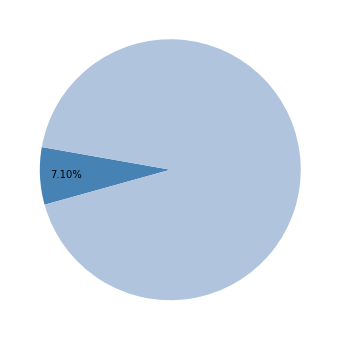

In [56]:
# Créer un diagramme à secteurs
reste = 100 - pourcentage_sous_nutrition_monde
parts = [pourcentage_sous_nutrition_monde, reste]
plt.figure(figsize=(9,6))
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if val <= pct:
            return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct
plt.pie(x=parts, labels=None, autopct=make_autopct(parts), colors=['steelblue', 'lightsteelblue'],  pctdistance = 0.80, startangle=170)
plt.rcParams['text.color'] = 'white'
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.title('') # Le titre du graphique est présent sur la slide de présentation, on l'omet ici pour éviter la répétition
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

Combien mange en moyenne un être humain ?

Selon l’Organisation des Nations Unies pour l’alimentation et l’agriculture (FAO), l’apport énergétique quotidien minimum requis est d’environ 1 800 kilocalories (7 500 kJ) par personne. Cependant, la consommation réelle peut varier en fonction de nombreux facteurs, y compris l’âge, le sexe, le niveau d’activité physique et l’état de santé général. On admet qu'un homme doit consommer en moyenne 2500 kilocalories par jour, 2000 pour une femme. La moyenne de ces deux valeurs est 2250 kilocalories. C'est le nombre que nous allons utiliser pour nos calculs.

Source : https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte.html


In [57]:
# Cette fois il va falloir fusionner les dataframes population_2017 et dispo_alimentaire

# Mais au préalable, on crée une variable qui stocke l'apport énergétique quotidien en kilocalories recommandé pour une personne
conso_kcal_jour_personne_recommandee = 2250

In [58]:
# On fait une jointure entre le data frame population_2017 et Dispo_alimentaire afin d'ajouter dans ce dernier la population
# On utilise une jointure à droite pour récupérer toutes les données du dataframe dispo_alimentaire
dispo_alimentaire_2017 = pd.merge(population_2017, dispo_alimentaire, on="Zone", how='right') 

In [59]:
#Création de la colonne dispo_kcal_par_jour_dans_le_pays 
dispo_alimentaire_2017['Dispo_Kcal_par_jour_dans_le_pays'] = dispo_alimentaire_2017['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alimentaire_2017['Population']
dispo_alimentaire_2017.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Dispo_Kcal_par_jour_dans_le_pays
0,Afghanistan,2017,36296113,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,181480565.0
1,Afghanistan,2017,36296113,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296113,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296113,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0


In [60]:
# Réorganisation des colonnes
colonnes= ['Zone','Année','Population','Produit','Origine','Aliments pour animaux','Autres Utilisations','Disponibilité alimentaire (Kcal/personne/jour)','Dispo_Kcal_par_jour_dans_le_pays','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']
dispo_alimentaire_2017 = dispo_alimentaire_2017.reindex(columns=colonnes)
dispo_alimentaire_2017.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Dispo_Kcal_par_jour_dans_le_pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113,Abats Comestible,animale,0.0,0.0,5.0,181480565.0,1.72,0.20,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113,"Agrumes, Autres",vegetale,0.0,0.0,1.0,36296113.0,1.29,0.01,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113,Aliments pour enfants,vegetale,0.0,0.0,1.0,36296113.0,0.06,0.01,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113,Ananas,vegetale,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113,Bananes,vegetale,0.0,0.0,4.0,145184452.0,2.70,0.02,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Calcul des kcal disponibles mondialement
total_dispo_kcal_jour_dans_le_monde = dispo_alimentaire_2017['Dispo_Kcal_par_jour_dans_le_pays'].sum()
print("Le nombre de kcal disponibles mondialement est de",total_dispo_kcal_jour_dans_le_monde,".")

Le nombre de kcal disponibles mondialement est de 21182162725177.0 .


In [62]:
# Calcul du nombre d'humains pouvant être nourris
nombre_humains_nourris = int(total_dispo_kcal_jour_dans_le_monde/conso_kcal_jour_personne_recommandee) # Ici on utilise la variable déclarée en début de 3.2
print('Le nombre d\'humains pouvant être nourris chaque jour dans le monde est de',round(nombre_humains_nourris/1e9,2),'milliards.')

Le nombre d'humains pouvant être nourris chaque jour dans le monde est de 9.41 milliards.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [63]:
# Transfert des données avec les végétaux dans un nouveau dataframe
dispo_alimentaire_vegetale_2017 = dispo_alimentaire_2017.loc[dispo_alimentaire_2017['Origine']=='vegetale']

In [64]:
#Calcul du nombre de kcal disponible pour les végétaux
dispo_kcal_vegetales_jour_dans_le_monde = dispo_alimentaire_vegetale_2017['Dispo_Kcal_par_jour_dans_le_pays'].sum()
print("Le nombre de kilocalories d'origine végétale disponibles mondialement est de",dispo_kcal_vegetales_jour_dans_le_monde,".")

Le nombre de kilocalories d'origine végétale disponibles mondialement est de 17449509402416.0 .


In [65]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nombre_humains_nourris_avec_vegetaux = int(dispo_kcal_vegetales_jour_dans_le_monde/conso_kcal_jour_personne_recommandee)
print('Le nombre d\'humains pouvant être nourris avec les végétaux chaque jour dans le monde est de',round(nombre_humains_nourris_avec_vegetaux/1e9,2),'milliards.')

Le nombre d'humains pouvant être nourris avec les végétaux chaque jour dans le monde est de 7.76 milliards.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [66]:
#Calcul de la disponibilité totale
disponibilite_interieure_monde = dispo_alimentaire_2017['Disponibilité intérieure'].sum()
disponibilite_interieure_monde = round(disponibilite_interieure_monde/1e12,2) # pour obtenir une donnée en milliards de tonnes
print("La disponibilité intérieure mondiale est de",disponibilite_interieure_monde,"milliards de tonnes.")

La disponibilité intérieure mondiale est de 9.85 milliards de tonnes.


In [67]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,
proportions= {}
df_columns = ['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']
for column in dispo_alimentaire_2017.columns:
    if column in df_columns:
        column_sum = dispo_alimentaire_2017[column].sum()
        disponibilite_interieure_monde = dispo_alimentaire_2017['Disponibilité intérieure'].sum()
        proportion = round((column_sum / disponibilite_interieure_monde)*100,2)
        proportions[column] = proportion
        
# On transforme le dictionnaire en Series
proportions = pd.Series(proportions)


proportions 

Aliments pour animaux    13.24
Autres Utilisations       8.78
Nourriture               49.51
Pertes                    4.61
Semences                  1.57
Traitement               22.38
dtype: float64

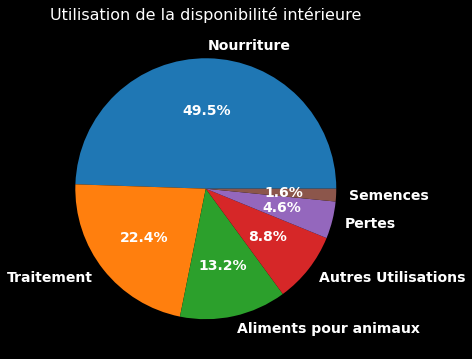

In [68]:
# On visualise la répartition à l'aide d'un diagramme à secteurs (en triant au préalable les valeurs du plus grand au plus petit)
sorted_proportions = proportions.sort_values(ascending=False)
plt.figure(figsize=(9,6), facecolor='black')
plt.pie(x=sorted_proportions, labels=sorted_proportions.index,  autopct='%1.1f%%')
plt.title("Utilisation de la disponibilité intérieure", fontsize=16, loc='center')
plt.rcParams['text.color'] = 'white'
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'
plt.show()

In [69]:
# On transforme la Series en dataframe pour avoir une colonne Type_utilisation
sorted_proportions = sorted_proportions.reset_index()
sorted_proportions.columns = ['Type_utilisation', 'Proportion']
sorted_proportions

,Type_utilisation,Proportion
0,Nourriture,49.51
1,Traitement,22.38
2,Aliments pour animaux,13.24
3,Autres Utilisations,8.78
4,Pertes,4.61
5,Semences,1.57


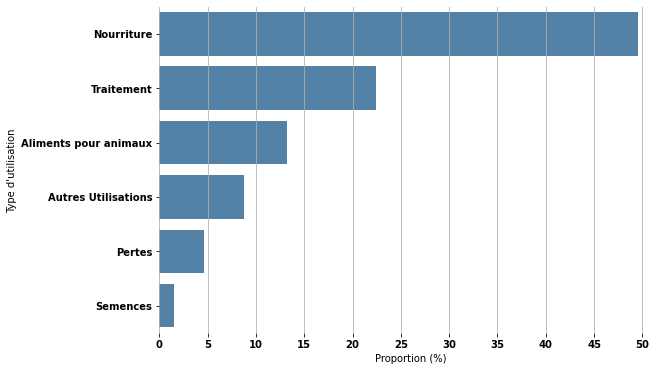

In [70]:
# On génère un barplot qui sera ajouté à la présentation powerpoint
plt.figure(figsize=(9,6), facecolor='white')
sns.barplot(data=sorted_proportions, x='Proportion', y='Type_utilisation', color='steelblue', orient='h')
# plt.title("Utilisation de la disponibilité intérieure", fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Proportion (%)', fontsize=10)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.ylabel('Type d\'utilisation', fontsize=10)
plt.grid(axis='x')
plt.box(False)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [71]:
# Consulter tous les noms de produits du dataframe
dispo_alimentaire_2017['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [72]:
# Création d'une liste avec tous les nomes de céréales
liste_cereales = ['Blé', 'Céréales, Autres', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho']

In [73]:
# Création d'un dataframe avec les informations uniquement pour ces céréales
# .isin() permet de ne récupérer que les noms de produits qui figurent dans la liste déclarée plus haut
df_cereales = dispo_alimentaire_2017.loc[dispo_alimentaire_2017['Produit'].isin(liste_cereales)] 
df_cereales.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Dispo_Kcal_par_jour_dans_le_pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,2017,36296113,Blé,vegetale,0.0,0.0,1369.0,4.968938e+10,160.23,4.69,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,2017,36296113,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.000000e+00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,2017,36296113,Maïs,vegetale,200000000.0,0.0,21.0,7.622184e+08,2.50,0.30,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,2017,36296113,Millet,vegetale,0.0,0.0,3.0,1.088883e+08,0.40,0.02,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,2017,36296113,Orge,vegetale,360000000.0,0.0,26.0,9.436989e+08,2.92,0.24,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0


In [74]:
# Part de l'utilisation des principales céréales dans l'alimentation humaine

# 1) Calcul de la disponibilité intérieure mondiale de céréales
dispo_interieure_cereales_monde = df_cereales['Disponibilité intérieure'].sum()

# 2) Calcul de la proportion utilisée pour l'alimentation humaine
part_alimentation_humaine = round((df_cereales.iloc[:,14].sum()/dispo_interieure_cereales_monde)*100,1)

# Affichage de cette proportion
print(" La proportion de la disponibilité intérieure mondiale de céréales qui est utilisée pour l'alimentation humaine est de",part_alimentation_humaine,"%.")

 La proportion de la disponibilité intérieure mondiale de céréales qui est utilisée pour l'alimentation humaine est de 42.8 %.


In [75]:
# Part de l'utilisation des principales céréales dans l'alimentation animale

part_alimentation_animale = round((df_cereales.iloc[:,5].sum()/dispo_interieure_cereales_monde)*100,1)

# Affichage de cette proportion
print(" La proportion de la disponibilité intérieure mondiale de céréales qui est utilisée pour l'alimentation animale est de",part_alimentation_animale,"%.")

 La proportion de la disponibilité intérieure mondiale de céréales qui est utilisée pour l'alimentation animale est de 36.3 %.


In [76]:
# Calcul, pour chaque céréale, de la disponibilité de ladite céréale utilisée pour l'alimentation humaine
# en utilisant la variable liste_cereales déclarée plus haut
proportion_cereale_alimentation_humaine = {}

for cereale in liste_cereales:
    df_cereale = df_cereales.loc[df_cereales['Produit'] == cereale, :]
    dispo_interieure_cereale = df_cereale['Disponibilité intérieure'].sum()
    somme_utilisation_humaine = df_cereale['Nourriture'].sum()
    part_cereale_alimentaion_humaine = round((somme_utilisation_humaine/dispo_interieure_cereale)*100,2)
    proportion_cereale_alimentation_humaine[cereale] = part_cereale_alimentaion_humaine
    
df_proportion_cereale_alim_humaine = pd.DataFrame(list(proportion_cereale_alimentation_humaine.items()), columns=['Céréale', 'Utilisation humaine'])
df_proportion_cereale_alim_humaine

,Céréale,Utilisation humaine
0,Blé,67.38
1,"Céréales, Autres",19.37
2,Riz (Eq Blanchi),79.32
3,Orge,4.84
4,Maïs,13.10
5,Seigle,33.21
6,Avoine,16.67
7,Millet,77.03
8,Sorgho,41.47


In [77]:
# Calcul, pour chaque céréale, de la disponibilité de ladite céréale utilisée pour l'alimentation animale
proportion_cereale_alimentation_animale = {}

for cereale in liste_cereales:
    df_cereale = df_cereales.loc[df_cereales['Produit'] == cereale, :]
    dispo_interieure_cereale = df_cereale['Disponibilité intérieure'].sum()
    somme_utilisation_animale = df_cereale['Aliments pour animaux'].sum()
    part_cereale_alimentaion_animale = round((somme_utilisation_animale/dispo_interieure_cereale)*100,2)
    proportion_cereale_alimentation_animale[cereale] = part_cereale_alimentaion_animale
    
df_proportion_cereale_alim_animale = pd.DataFrame(list(proportion_cereale_alimentation_animale.items()), columns=['Céréale', 'Utilisation animale'])
df_proportion_cereale_alim_animale

,Céréale,Utilisation animale
0,Blé,19.08
1,"Céréales, Autres",69.26
2,Riz (Eq Blanchi),7.06
3,Orge,65.98
4,Maïs,57.14
5,Seigle,48.89
6,Avoine,69.43
7,Millet,11.05
8,Sorgho,42.60


In [78]:
# Fusion des dataframes df_proportion_cereale_alim_humaine et df_proportion_cereale_alim_animale et ajour d'une colonne 'Autres' (pour autres utilisations)
proportion_cereale_alim_humaine_et_animale = pd.merge(df_proportion_cereale_alim_humaine, df_proportion_cereale_alim_animale, on='Céréale', how='inner')
proportion_cereale_alim_humaine_et_animale = proportion_cereale_alim_humaine_et_animale.sort_values('Utilisation humaine', ascending=False)
proportion_cereale_alim_humaine_et_animale['Autres'] = 100 - proportion_cereale_alim_humaine_et_animale['Utilisation humaine'] - proportion_cereale_alim_humaine_et_animale['Utilisation animale']
proportion_cereale_alim_humaine_et_animale

,Céréale,Utilisation humaine,Utilisation animale,Autres
2,Riz (Eq Blanchi),79.32,7.06,13.62
7,Millet,77.03,11.05,11.92
0,Blé,67.38,19.08,13.54
8,Sorgho,41.47,42.60,15.93
5,Seigle,33.21,48.89,17.90
1,"Céréales, Autres",19.37,69.26,11.37
6,Avoine,16.67,69.43,13.90
4,Maïs,13.10,57.14,29.76
3,Orge,4.84,65.98,29.18


(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 648x432 with 0 Axes>

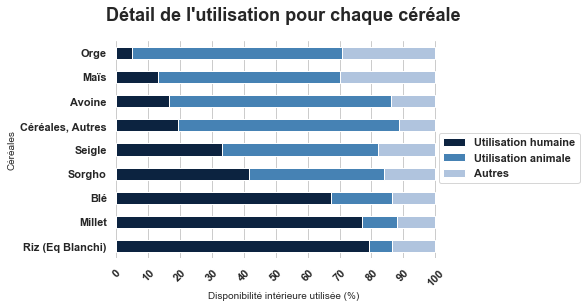

In [79]:
# Visualisation des proportions à l'aide d'un graphique à barres empilées horizontale
plt.figure(figsize=(9,6))
sns.set(style='white')
proportion_cereale_alim_humaine_et_animale.set_index('Céréale').plot(kind='barh', stacked=True, color=['#0C2340', 'steelblue', 'lightsteelblue'])
plt.title('Détail de l\'utilisation pour chaque céréale', fontsize=18, fontweight='bold', pad=20, loc='center')
plt.xlabel('Disponibilité intérieure utilisée (%)', fontsize=10)
plt.ylabel('Céréales', fontsize=10)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.legend(bbox_to_anchor=(1.40,0.60), loc='upper right')
plt.grid(axis='x')
plt.box(False)
plt.xticks(rotation=45)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentées la plus forte en 2017</h3>
</div>

In [80]:
#Création d'une colonne "en_pourcentage_de_la_population" contenant la proportion de personnes en état de sous-nutrition pour chaque pays ou "zone"
proportion_sous_nutrition['en_pourcentage_de_la_population'] = round((proportion_sous_nutrition['Habitants_en_sous_nutrition']/proportion_sous_nutrition['Population'])*100,2)

In [81]:
# Identifier les 10 pays où le pourcentage d'habitants en sous-nutrition est le plus élevé
Top_10_pires_pays = proportion_sous_nutrition.nlargest(10, 'en_pourcentage_de_la_population')
Top_10_pires_pays

,Zone,Année_x,Population,Habitants_en_sous_nutrition,en_pourcentage_de_la_population
87,Haïti,2017,10982366,5300000.0,48.26
181,Corée du Nord,2017,25429825,12000000.0,47.19
128,Madagascar,2017,25570512,10500000.0,41.06
122,Libéria,2017,4702226,1800000.0,38.28
119,Lesotho,2017,2091534,800000.0,38.25
216,Tchad,2017,15016753,5700000.0,37.96
186,Rwanda,2017,11980961,4200000.0,35.06
145,Mozambique,2017,28649018,9400000.0,32.81
219,Timor-Leste,2017,1243258,400000.0,32.17
0,Afghanistan,2017,36296113,10500000.0,28.93


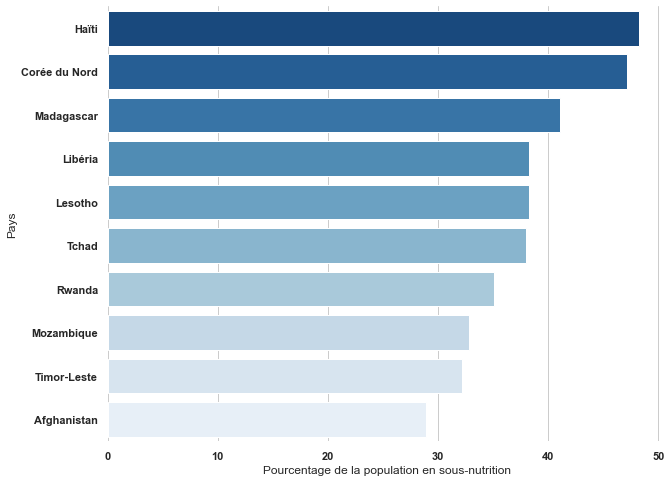

In [82]:
# On visualise le Top 10 des pays où la population souffre le plus de sous-nutrition à l'aide d'un barplot
plt.figure(figsize=(10,8))
palette = sns.color_palette("Blues", n_colors=10).as_hex()[::-1]
sns.barplot(x='en_pourcentage_de_la_population', y='Zone', data = Top_10_pires_pays, orient='h', palette=palette)
# plt.title('Top 10 des pays où la population souffre le plus de sous-nutrition en 2017', fontname='Arial', fontsize=20, fontweight='bold', pad=20, loc='center')
plt.ylabel('Pays')
plt.xlabel('Pourcentage de la population en sous-nutrition',fontsize=12)
plt.grid(axis='x')
plt.box(False)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [83]:
# Calcul du total de l'aide alimentaire par pays
# On regroupe les lignes par pays puis on utilise la fonction d'agrégation .sum() pour obtenir le montant total de l'aide alimentaire pour le pays considéré
total_aide_alimentaire_par_pays = aide_alimentaire.groupby(['Zone'])['Valeur'].sum()

In [84]:
# Calcul de l'aide alimentaire totale distribuée dans le monde, que l'on divise ensuite par 1 million pour avoir une donné exprimée en milliers de tonnes
total_aide_alimentaire_monde_milliers_tonnes = int(round(total_aide_alimentaire_par_pays.sum() / 1e6))
print("L'aide alimentaire totale distribuée dans le monde s'élève à",total_aide_alimentaire_monde_milliers_tonnes,"milliers de tonnes")

L'aide alimentaire totale distribuée dans le monde s'élève à 11036 milliers de tonnes


In [85]:
# Calcul des 10 pays qui ont bénéficié le plus de l'aide alimentaire avec des données exprimées en milliers de tonnes
top_beneficiaires = total_aide_alimentaire_par_pays.nlargest(10)
top_beneficiaires_milliers_tonnes =  round(top_beneficiaires/1e6,0)
top_beneficiaires_milliers_tonnes = top_beneficiaires_milliers_tonnes.reset_index()

# Ajout d'une colonne qui exprime l'aide reçue par le pays en pourcentage de l'aide alimentaire totale distribuée dans le monde
top_beneficiaires_milliers_tonnes["En_pourcentage de l'aide alimentaire distribuée dans le monde"] = round((top_beneficiaires_milliers_tonnes['Valeur'] / total_aide_alimentaire_monde_milliers_tonnes)*100,1)
top_beneficiaires_milliers_tonnes.rename(columns={'Valeur': 'Aide alimentaire reçue (milliers de tonnes)'}, inplace=True)

In [86]:
top_beneficiaires_milliers_tonnes

,Zone,Aide alimentaire reçue (milliers de tonnes),En_pourcentage de l'aide alimentaire distribuée dans le monde
0,Syrie,1859.0,16.8
1,Éthiopie,1381.0,12.5
2,Yémen,1206.0,10.9
3,Soudan du Sud,695.0,6.3
4,Soudan,670.0,6.1
5,Kenya,553.0,5.0
6,Bangladesh,348.0,3.2
7,Somalie,293.0,2.7
8,République démocratique du Congo,289.0,2.6
9,Niger,276.0,2.5


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficié de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [87]:
# Création d'un dataframe avec la zone, l'année et l'aide alimentaire... 
df_aide_alimentaire = aide_alimentaire.drop(columns='Produit')

In [88]:
# ...puis groupby sur zone et année 
df_aide_alimentaire_grp = df_aide_alimentaire.groupby(['Zone', 'Année'])['Valeur'].sum()
df_aide_alimentaire_grp.head(20)

Zone          Année
Afghanistan   2013     128238000
              2014      57214000
Algérie       2013      35234000
              2014      18980000
              2015      17424000
              2016       9476000
Angola        2013       5000000
              2014         14000
Bangladesh    2013     131018000
              2014     194628000
              2015      22542000
Bhoutan       2013       1724000
              2014        146000
              2015        578000
              2016        218000
Bolivie       2014          6000
Burkina Faso  2013      18620000
              2014      22938000
              2015      23182000
              2016         72000
Name: Valeur, dtype: int64

In [89]:
#Création d'une liste contenant les noms des 5 pays qui ont le plus bénéficié de l'aide alimentaire 
# à partir de la Series "top_beneficiaires" (voir 3.7) on récupère les index des 5 premiers, en l'occurrence leurs noms.
liste = top_beneficiaires.head().index.tolist()
liste

['Syrie', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [90]:
#On filtre sur le dataframe avec notre liste
df_filtre = df_aide_alimentaire_grp.loc[df_aide_alimentaire_grp.index.get_level_values('Zone').isin(liste)]

In [91]:
# Affichage des 5 pays avec l'aide alimentaire par année
df_filtre

Zone           Année
Soudan         2013     330230000
               2014     321904000
               2015      17650000
Soudan du Sud  2013     196330000
               2014     450610000
               2015      48308000
Syrie          2013     563566000
               2014     651870000
               2015     524949000
               2016     118558000
Yémen          2013     264764000
               2014     103840000
               2015     372306000
               2016     465574000
Éthiopie       2013     591404000
               2014     586624000
               2015     203266000
Name: Valeur, dtype: int64

In [92]:
# On vérifie le type de df_filtre car nous avons deux valeurs en index; Zone et Année
type(df_filtre)

pandas.core.series.Series

In [93]:
# On réinitialise les index de façon à avoir les noms de pays et l'année dans une colonne et non plus en index (la series devient un dataframe)
df_filtre = df_filtre.reset_index()
df_filtre

,Zone,Année,Valeur
0,Soudan,2013,330230000
1,Soudan,2014,321904000
2,Soudan,2015,17650000
3,Soudan du Sud,2013,196330000
4,Soudan du Sud,2014,450610000
5,Soudan du Sud,2015,48308000
6,Syrie,2013,563566000
7,Syrie,2014,651870000
8,Syrie,2015,524949000
9,Syrie,2016,118558000


In [94]:
# Division de la colonne Valeur par 1 million par avoir les données en milliers de tonnes
df_filtre['Valeur'] = round(df_filtre['Valeur']/1e6,2)

In [95]:
# Utilisation de la méthode .pivot_table pour avoir les différentes années en colonnes et la Zone en index
df_filtre_pivot = df_filtre.pivot_table(index='Zone', columns='Année', values='Valeur')
df_filtre_pivot

Année,2013,2014,2015,2016
Zone,,,,
Soudan,330.23,321.90,17.65,NaN
Soudan du Sud,196.33,450.61,48.31,NaN
Syrie,563.57,651.87,524.95,118.56
Yémen,264.76,103.84,372.31,465.57
Éthiopie,591.40,586.62,203.27,NaN


In [96]:
# # Une possibilité : Traiter les valeurs NaN

# # Solution 1 : remplacer les NaN par les valeurs trouvées sur internet
# # df_filtre_pivot.iloc[0,3] = # non trouvée
# df_filtre_pivot.iloc[1,3] = 265 # https://www.unicef.org/fr/communiqu%C3%A9s-de-presse/soudan-du-sud%E2%80%AF-plusieurs-r%C3%A9gions-touch%C3%A9es-par-la-famine
# # df_filtre_pivot.iloc[4,3] = # non trouvée

# # Solution 2 : remplacer les NaN qui n'ont pas pu être remplacée avec la solution 1 par la moyenne des années précédentes.
# for index, row in df_filtre_pivot.iterrows():
#     if np.isnan(row[2016]):
#         df_filtre_pivot.loc[index, 2016] = row[[2013, 2014, 2015]].mean()
# df_filtre_pivot

In [97]:
# On crée un nouveau dataframe tout en utilisant la fonction reset_index() pour réinitialiser les index et ce faisant avoir la Zone à nouveau en colonne
#  ainsi que la fonction .melt() pour replacer les années dans une seule colonne (id_vars permet ici de garder la colonne Zone inchangée)
df_filtre_melt = df_filtre_pivot.reset_index().melt(id_vars='Zone', var_name='Année', value_name='Valeur')
df_filtre_melt

,Zone,Année,Valeur
0,Soudan,2013,330.23
1,Soudan du Sud,2013,196.33
2,Syrie,2013,563.57
3,Yémen,2013,264.76
4,Éthiopie,2013,591.40
5,Soudan,2014,321.90
6,Soudan du Sud,2014,450.61
7,Syrie,2014,651.87
8,Yémen,2014,103.84
9,Éthiopie,2014,586.62


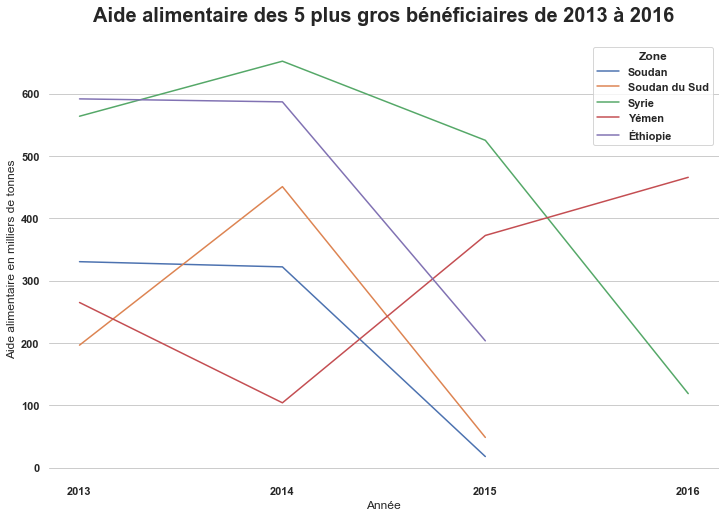

In [98]:
# Affichage de l'évolution de l'aide alimentaire avec un lineplot
import matplotlib.ticker as ticker
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=df_filtre_melt, x='Année', y='Valeur', hue='Zone')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
plt.title('Aide alimentaire des 5 plus gros bénéficiaires de 2013 à 2016', fontsize=20, fontweight='bold', loc='center', pad=20)
plt.ylabel('Aide alimentaire en milliers de tonnes')
plt.box(False)
plt.grid(axis='y')
plt.show()

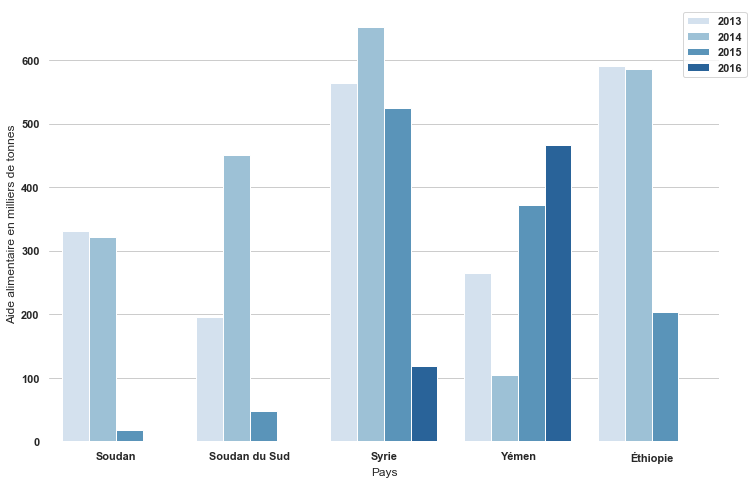

In [99]:
# Affichage des données avec un barplot 
plt.figure(figsize=(12,8))
palette = sns.color_palette("Blues", n_colors=4).as_hex()[::]
sns.barplot(data=df_filtre_melt, x='Zone', y='Valeur', hue='Année', palette=palette)
# plt.title('Aide alimentaire des 5 plus gros bénéficiaires de 2013 à 2016', fontsize=18, fontweight='bold', loc='center', pad=20)
plt.ylabel('Aide alimentaire en milliers de tonnes')
plt.xlabel('Pays')
plt.box(False)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper right')
plt.grid(axis='y')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [100]:
# Calcul de la disponibilité en kcal par personne par jour par pays
dispo_kcal_personne_jour_pays_2017_grp = dispo_alimentaire_2017.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

In [101]:
# Affichage de la series
dispo_kcal_personne_jour_pays_2017_grp.head()

Zone
Afghanistan       2087.0
Afrique du Sud    3020.0
Albanie           3188.0
Algérie           3293.0
Allemagne         3503.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [102]:
# Affichage des 10 pays qui ont le moins de dispo alimentaire par personne:

# dispo_kcal_personne_jour_pays_2017_grp.sort_values().head(10)
# OU
top_10_dispo_alimentaire_insuffisante = dispo_kcal_personne_jour_pays_2017_grp.nsmallest(10)

# On transforme la Series en dataframe tout en réinitialisant les index
top_10_dispo_alimentaire_insuffisante = top_10_dispo_alimentaire_insuffisante.reset_index()

# Ici toutes les zones correspondent bien à des pays donc on renomme la colonne Zone en 'Pays'
top_10_dispo_alimentaire_insuffisante.rename(columns={'Zone':'Pays'}, inplace=True)

In [103]:
# Calcul de la disponibilité alimentaire en pourcentage de l'apport calorique recommandé et ajout d'une colonne contenant cette valeur
# On se sert de la variable conso_kcal_jour_personne_recommandee déclarée en 3.2 pour calculer ce pourcentage
top_10_dispo_alimentaire_insuffisante["En pourcentage de l'apport calorique recommandé"] = round((top_10_dispo_alimentaire_insuffisante['Disponibilité alimentaire (Kcal/personne/jour)'] / conso_kcal_jour_personne_recommandee)*100,1)
top_10_dispo_alimentaire_insuffisante

,Pays,Disponibilité alimentaire (Kcal/personne/jour),En pourcentage de l'apport calorique recommandé
0,République centrafricaine,1879.0,83.5
1,Zambie,1924.0,85.5
2,Madagascar,2056.0,91.4
3,Afghanistan,2087.0,92.8
4,Haïti,2089.0,92.8
5,Corée du Nord,2093.0,93.0
6,Tchad,2109.0,93.7
7,Zimbabwe,2113.0,93.9
8,Ouganda,2126.0,94.5
9,Timor-Leste,2129.0,94.6


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [104]:
# Affichage des 10 pays qui ont le plus de dispo alimentaire par personne (répétition de ce qui a été fait plus haut pour les pays qui ont le plus de dispo)
top_10_plus_de_dispo = dispo_kcal_personne_jour_pays_2017_grp.nlargest(10)
top_10_plus_de_dispo = top_10_plus_de_dispo.reset_index()
top_10_plus_de_dispo.columns = ['Pays', 'Disponibilité alimentaire (Kcal/personne/jour)']
top_10_plus_de_dispo["En pourcentage de l'apport calorique recommandé"] = round((top_10_plus_de_dispo['Disponibilité alimentaire (Kcal/personne/jour)'] / conso_kcal_jour_personne_recommandee)*100,1)
top_10_plus_de_dispo

,Pays,Disponibilité alimentaire (Kcal/personne/jour),En pourcentage de l'apport calorique recommandé
0,Autriche,3770.0,167.6
1,Belgique,3737.0,166.1
2,Turquie,3708.0,164.8
3,États-Unis d'Amérique,3682.0,163.6
4,Israël,3610.0,160.4
5,Irlande,3602.0,160.1
6,Italie,3578.0,159.0
7,Luxembourg,3540.0,157.3
8,Égypte,3518.0,156.4
9,Allemagne,3503.0,155.7


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [105]:
# Création d'un dataframe dispo_alimentaire avec uniquement la Thaïlande
df_dispo_alimentaire_thailande = dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Thaïlande', :]

In [106]:
#Calcul de la sous-nutrition en Thaïlande
# On se sert du dataframe "proportion_sous_nutrition" qui contient les données de sous-nutrition pour chaque pays
sous_nutrition_thailande = proportion_sous_nutrition.loc[proportion_sous_nutrition['Zone'] == 'Thaïlande', :]
sous_nutrition_thailande = sous_nutrition_thailande.iloc[0,-1]
print("Le taux de sous-nutrition en Thaïlande est de",sous_nutrition_thailande,"%.")

Le taux de sous-nutrition en Thaïlande est de 8.96 %.


In [107]:
# On récupère uniquement les données pour le Manioc dans un nouveau dataframe
df_Manioc_thailande = df_dispo_alimentaire_thailande.loc[df_dispo_alimentaire_thailande['Produit'] == 'Manioc', :]
# que l'on affiche
df_Manioc_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [108]:
# Calcul de la proportion de Manioc exporté

# Note: .iloc[0,10] renvoie la valeur qui se trouve à l'intersection de la ligne 0 et de la colonne 10 (soit la première (en l'occurrence l'unique) ligne et la 11e colonne)
proportion_Manioc_exportee =  round((df_Manioc_thailande.iloc[0, 10]/df_Manioc_thailande.iloc[0, 14])*100,2)
print("La proportion de Manioc exporté est de",proportion_Manioc_exportee,"%.")

La proportion de Manioc exporté est de 83.41 %.


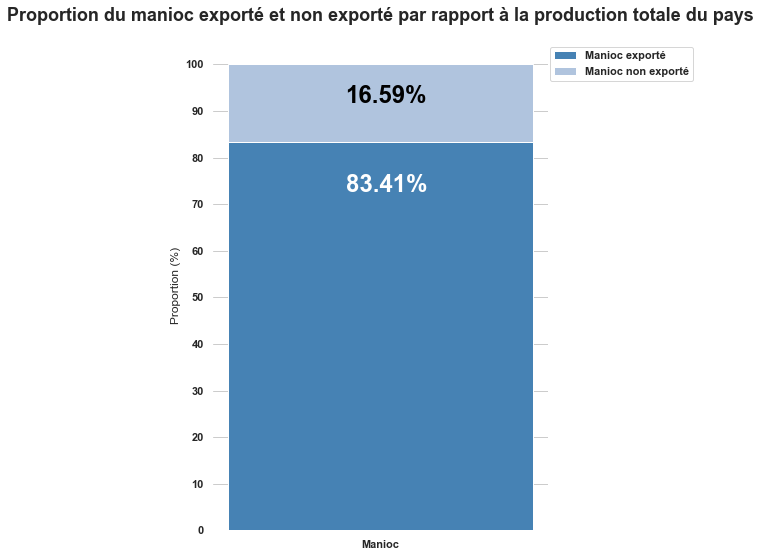

In [109]:
# Affichage de cette proportion avec un graphique à barres empilées
proportion_non_exportee = 100 - proportion_Manioc_exportee
plt.figure(figsize=(6,9))
plt.bar('Manioc', proportion_Manioc_exportee, label="Manioc exporté", color='steelblue')
plt.bar('Manioc', proportion_non_exportee, bottom=proportion_Manioc_exportee, label='Manioc non exporté', color='lightsteelblue')
plt.title('Proportion du manioc exporté et non exporté par rapport à la production totale du pays', fontsize=18, fontweight='bold', pad=20, loc='center')
plt.ylabel('Proportion (%)')
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right')
plt.box(False)
plt.grid(axis='y')
plt.annotate(f'{proportion_Manioc_exportee:.2f}%', xy=(0, proportion_Manioc_exportee), xytext=(-35, -50), textcoords='offset points', fontsize=24, color='white', fontweight='bold')
plt.annotate(f'{proportion_non_exportee:.2f}%', xy=(0, proportion_non_exportee), xytext=(-35, 350), textcoords='offset points', fontsize=24, color='black', fontweight='bold')
plt.show()



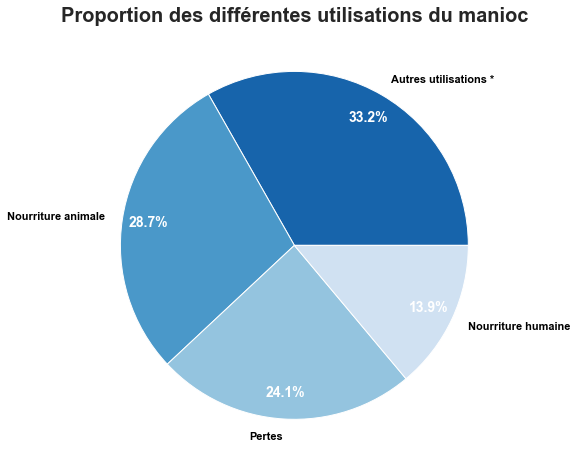

In [110]:
# Affichage des proportions des différentes utilisations du Manioc

# On déclare les différentes variables
Nourriture_animaux = df_Manioc_thailande.iloc[0,3]
# Ici on regoupe Semences et Traitement avec Autres Utilisations car semences et traitement sont à 0
Autres_utilisations = df_Manioc_thailande.iloc[0,4] + df_Manioc_thailande.iloc[0,15] + df_Manioc_thailande.iloc[0,16]
Nourriture_humains = df_Manioc_thailande.iloc[0,12]
Pertes = df_Manioc_thailande.iloc[0,13]
proportion_Manioc_exportee = df_Manioc_thailande.iloc[0,10]
importations_manioc = df_Manioc_thailande.iloc[0,11]

# On crée une liste pour stocker les labels et une autre pour stocker les variables déclarées plus haut
labels = ['Autres utilisations *', 'Nourriture animale', 'Pertes', 'Nourriture humaine']
parts = [Autres_utilisations, Nourriture_animaux, Pertes, Nourriture_humains]

# On visualise ces proportions à l'aide d'un  pie chart
plt.figure(figsize=(12,8), facecolor='white')
palette = sns.color_palette("Blues", n_colors=4).as_hex()[::-1]
wedges, texts, autotexts = plt.pie(x=parts, labels=labels, autopct='%1.1f%%', colors=palette, pctdistance = 0.85)
plt.title("Proportion des différentes utilisations du manioc", fontsize=20, fontweight='bold', loc='center')
plt.setp(autotexts, color='white', weight='bold', size=14)
plt.setp(texts, color='black', family='Arial')
plt.show()


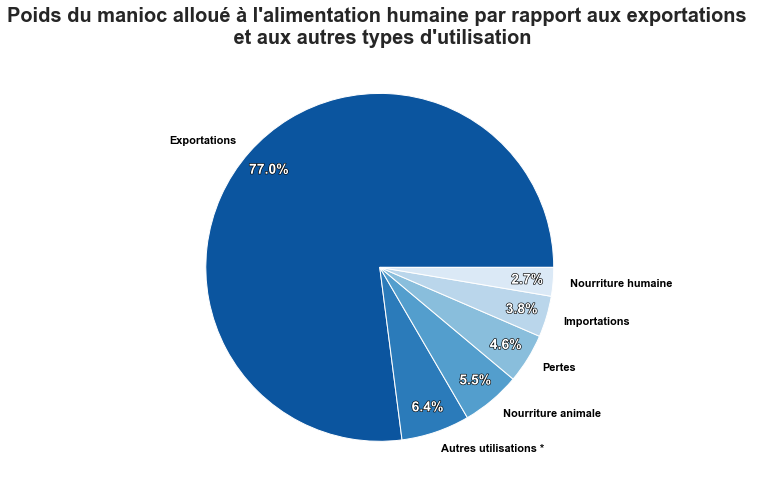

In [111]:
# Affichage d'un graphique qui montre le poids du manioc alloué à l'alimentation humaine comparé aux exportations et aux autres types d'utilisation

labels = ['Exportations', 'Autres utilisations *', 'Nourriture animale', 'Pertes', 'Importations', 'Nourriture humaine']
parts = [proportion_Manioc_exportee, Autres_utilisations, Nourriture_animaux, Pertes, importations_manioc, Nourriture_humains]
plt.figure(figsize=(12,8), facecolor='white')
palette = sns.color_palette("Blues", n_colors=6).as_hex()[::-1]
wedges, texts, autotexts = plt.pie(x=parts, labels=labels, autopct='%1.1f%%', colors=palette, pctdistance = 0.85)

# Les pourcentages sont en blanc mais sur les secteurs de couleur plus claire on voit moins bien...
# On ajoute une fine bordure noire aux chiffres de façon à mieux les distinguer
for autotext in autotexts:
    autotext.set_path_effects([pe.Stroke(linewidth=1.2, foreground='black'), pe.Normal()])

plt.title("Poids du manioc alloué à l'alimentation humaine par rapport aux exportations \n et aux autres types d'utilisation", fontsize=20, fontweight='bold', loc='center')
plt.setp(autotexts, color='white', weight='bold', size=14)
plt.setp(texts, color='black', family='Arial')
plt.show()


In [112]:
# Afficher la disponibilité par personne et par jour en Thaïlande
dispo_personne_jour_thailande = dispo_kcal_personne_jour_pays_2017_grp['Thaïlande']
print('La diponibilité par personne et par jour en thailande est de',dispo_personne_jour_thailande,'kilocalories')

La diponibilité par personne et par jour en thailande est de 2785.0 kilocalories


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse complémentaires</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1 - Corrélation entre la disponibilité alimentaire (par personne et par jour) et la proportion de population en sous-nutrition.</h3>
</div>

In [113]:
# On crée un dataframe à partir de la Series dispo_kcal_personne_jour_pays_2017_grp
dispo_kcal = dispo_kcal_personne_jour_pays_2017_grp.reset_index()
dispo_kcal.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


In [114]:
# Fusion de dispo_kcal et proportion_sous_nutrition avec suppression des lignes ayant des 0 dans la colonne Habitants_en_sous_nutrition
dispo_kcal_et_sous_nutrition = pd.merge(dispo_kcal, proportion_sous_nutrition, on='Zone', how='inner')
dispo_kcal_et_sous_nutrition.replace(0, np.nan, inplace=True)
dispo_kcal_et_sous_nutrition.dropna(axis='index', how='any', inplace=True)

# Affichage des 20 premières lignes du dataframe
dispo_kcal_et_sous_nutrition.head(20)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année_x,Population,Habitants_en_sous_nutrition,en_pourcentage_de_la_population
0,Afghanistan,2087.0,2017,36296113,10500000.0,28.93
1,Afrique du Sud,3020.0,2017,57009756,3100000.0,5.44
2,Albanie,3188.0,2017,2884169,100000.0,3.47
3,Algérie,3293.0,2017,41389189,1300000.0,3.14
5,Angola,2474.0,2017,29816766,5800000.0,19.45
7,Arabie saoudite,3255.0,2017,33101178,1600000.0,4.83
8,Argentine,3226.0,2017,43937140,1500000.0,3.41
14,Bangladesh,2453.0,2017,159685424,21500000.0,13.46
19,Bolivie,2250.0,2017,11192855,1700000.0,15.19
21,Botswana,2325.0,2017,2205080,500000.0,22.67


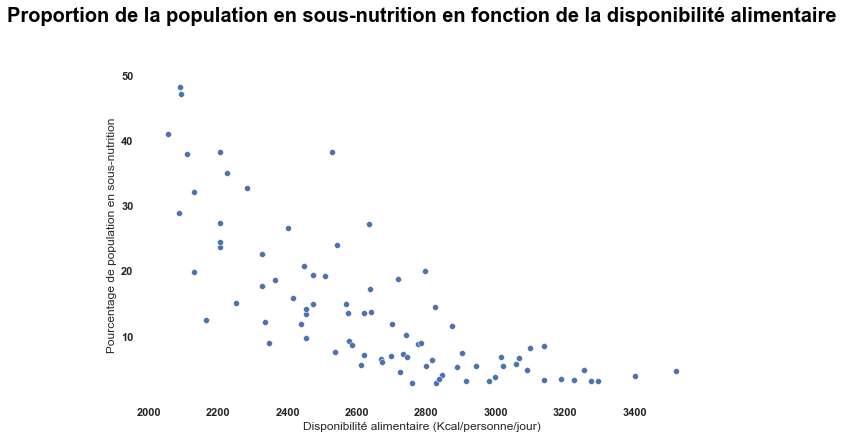

In [115]:
# graphique en nuage de points qui montre la corrélation entre la variable explicative (dispo alimentaire) et variable expliquée (proportion de personnes sous-alimentées )
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dispo_kcal_et_sous_nutrition, x='Disponibilité alimentaire (Kcal/personne/jour)', y='en_pourcentage_de_la_population')
plt.title('Proportion de la population en sous-nutrition en fonction de la disponibilité alimentaire', fontsize=20, fontweight='bold', color='black', loc='center', pad = 50)
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.ylabel('Pourcentage de population en sous-nutrition')
plt.box(False)
plt.show()



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2 - Aide alimentaire par habitant en état de sous-nutrition dans les 10 pays où la proportion de personnes en état de sous-nutrition est la plus élevée</h3>
</div>

In [116]:
# On affiche la series qui contient l'aide alimentaire totale attribuée à chaque pays bénéficiaire de 2013 à 2016
total_aide_alimentaire_par_pays.head()

Zone
Afghanistan    185452000
Algérie         81114000
Angola           5014000
Bangladesh     348188000
Bhoutan          2666000
Name: Valeur, dtype: int64

In [117]:
# On réinitialise les index de la series total_aide_alimentaire_par_pays pour avoir les noms de pays dans une colonne 'Zone'
# (ce qui transforme la Series en dataframe)
total_aide_alimentaire_par_pays = total_aide_alimentaire_par_pays.reset_index()

In [118]:
# On affiche les 5 premières lignes du dataframe
total_aide_alimentaire_par_pays.head()

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000


In [119]:
# On affiche le top 10 des pays où la proportion de personnes en sous-nutrition est la plus élevée
Top_10_pires_pays

,Zone,Année_x,Population,Habitants_en_sous_nutrition,en_pourcentage_de_la_population
87,Haïti,2017,10982366,5300000.0,48.26
181,Corée du Nord,2017,25429825,12000000.0,47.19
128,Madagascar,2017,25570512,10500000.0,41.06
122,Libéria,2017,4702226,1800000.0,38.28
119,Lesotho,2017,2091534,800000.0,38.25
216,Tchad,2017,15016753,5700000.0,37.96
186,Rwanda,2017,11980961,4200000.0,35.06
145,Mozambique,2017,28649018,9400000.0,32.81
219,Timor-Leste,2017,1243258,400000.0,32.17
0,Afghanistan,2017,36296113,10500000.0,28.93


In [120]:
# On fusionne les deux dataframes
df_10_pires_pays = pd.merge(total_aide_alimentaire_par_pays, Top_10_pires_pays, on='Zone', how='right')

# On remplace le nom de la colonne 'Valeur' par un quelque chose de plus explicite
df_10_pires_pays = df_10_pires_pays.rename(columns={'Valeur':'Total aide alimentaire (2013-2016)'})

# On réorganise la position des colonnes
colonnes = ['Zone', 'Année_x',	'Population', 'Habitants_en_sous_nutrition', 'en_pourcentage_de_la_population', 'Total aide alimentaire (2013-2016)']
df_10_pires_pays = df_10_pires_pays[colonnes]
df_10_pires_pays

,Zone,Année_x,Population,Habitants_en_sous_nutrition,en_pourcentage_de_la_population,Total aide alimentaire (2013-2016)
0,Haïti,2017,10982366,5300000.0,48.26,116450000
1,Corée du Nord,2017,25429825,12000000.0,47.19,187412000
2,Madagascar,2017,25570512,10500000.0,41.06,96678000
3,Libéria,2017,4702226,1800000.0,38.28,19846000
4,Lesotho,2017,2091534,800000.0,38.25,10624000
5,Tchad,2017,15016753,5700000.0,37.96,267966000
6,Rwanda,2017,11980961,4200000.0,35.06,11408000
7,Mozambique,2017,28649018,9400000.0,32.81,58612000
8,Timor-Leste,2017,1243258,400000.0,32.17,116000
9,Afghanistan,2017,36296113,10500000.0,28.93,185452000


In [121]:
# Calcul de l'aide alimentaire par personne sous-alimentées
df_10_pires_pays['Aide alimentaire par habitant en sous nutrition (kg)'] = round(df_10_pires_pays['Total aide alimentaire (2013-2016)']/df_10_pires_pays['Habitants_en_sous_nutrition'],1)
df_10_pires_pays_sorted = df_10_pires_pays.sort_values('Aide alimentaire par habitant en sous nutrition (kg)')

On constate sur le graphique ci-dessous que les pays les plus mal lotis, parmi les 10 pires pays où la sous-nutrition sévit le plus, sont Timor-Leste, Rwanda et Mozambique puisque les populations sous-alimentées de ces contrées sont celles qui reçoivent le moins d'aide alimentaire.

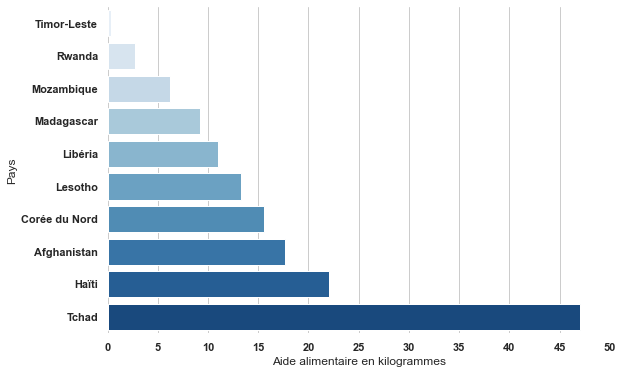

In [122]:
# Visualisation des résultats
plt.figure(figsize=(9,6))
palette = sns.color_palette("Blues", n_colors=10).as_hex()[::]
sns.barplot(data=df_10_pires_pays_sorted, y='Zone', x='Aide alimentaire par habitant en sous nutrition (kg)', orient='h', palette=palette)
# plt.title('Aide alimentaire par habitant en état de sous-nutrition (en kg).', fontsize=24, fontweight='bold', pad=50, loc='center')
plt.ylabel('Pays')
plt.xlabel('Aide alimentaire en kilogrammes')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.box(False)
plt.grid(axis='x')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3 - Répartition géographique des pays où la sous-nutrition sévit le plus. </h3>
</div>


In [123]:
# Installation du module geopandas
! pip install geopandas

In [124]:
# Importation du module
import geopandas as gpd

In [125]:
# Chargement d'une carte du monde
carte_monde = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# carte_monde.sort_values('name') <= décommenter pour visualiser les noms de pays de carte_monde

C:\Users\frede\AppData\Local\Temp\ipykernel_12728\153534346.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  carte_monde = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [126]:
# Les noms de pays dans carte_monde sont différents => on modifie certains noms de pays de df_10_pires_pays pour qu'ils correspondent
df_10_pires_pays['Zone'].replace({'Haïti': 'Haiti', 'Corée du Nord': 'North Korea', 'Libéria': 'Liberia', 'Tchad': 'Chad'}, inplace=True)
df_10_pires_pays

,Zone,Année_x,Population,Habitants_en_sous_nutrition,en_pourcentage_de_la_population,Total aide alimentaire (2013-2016),Aide alimentaire par habitant en sous nutrition (kg)
0,Haiti,2017,10982366,5300000.0,48.26,116450000,22.0
1,North Korea,2017,25429825,12000000.0,47.19,187412000,15.6
2,Madagascar,2017,25570512,10500000.0,41.06,96678000,9.2
3,Liberia,2017,4702226,1800000.0,38.28,19846000,11.0
4,Lesotho,2017,2091534,800000.0,38.25,10624000,13.3
5,Chad,2017,15016753,5700000.0,37.96,267966000,47.0
6,Rwanda,2017,11980961,4200000.0,35.06,11408000,2.7
7,Mozambique,2017,28649018,9400000.0,32.81,58612000,6.2
8,Timor-Leste,2017,1243258,400000.0,32.17,116000,0.3
9,Afghanistan,2017,36296113,10500000.0,28.93,185452000,17.7


C:\Users\frede\AppData\Local\Temp\ipykernel_12728\2862492495.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(carte_monde.geometry.centroid.x, carte_monde.geometry.centroid.y, carte_monde['name']):
C:\Users\frede\AppData\Local\Temp\ipykernel_12728\2862492495.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(label, xy=(x, y), xytext=(x + 15, y), fontsize=25,


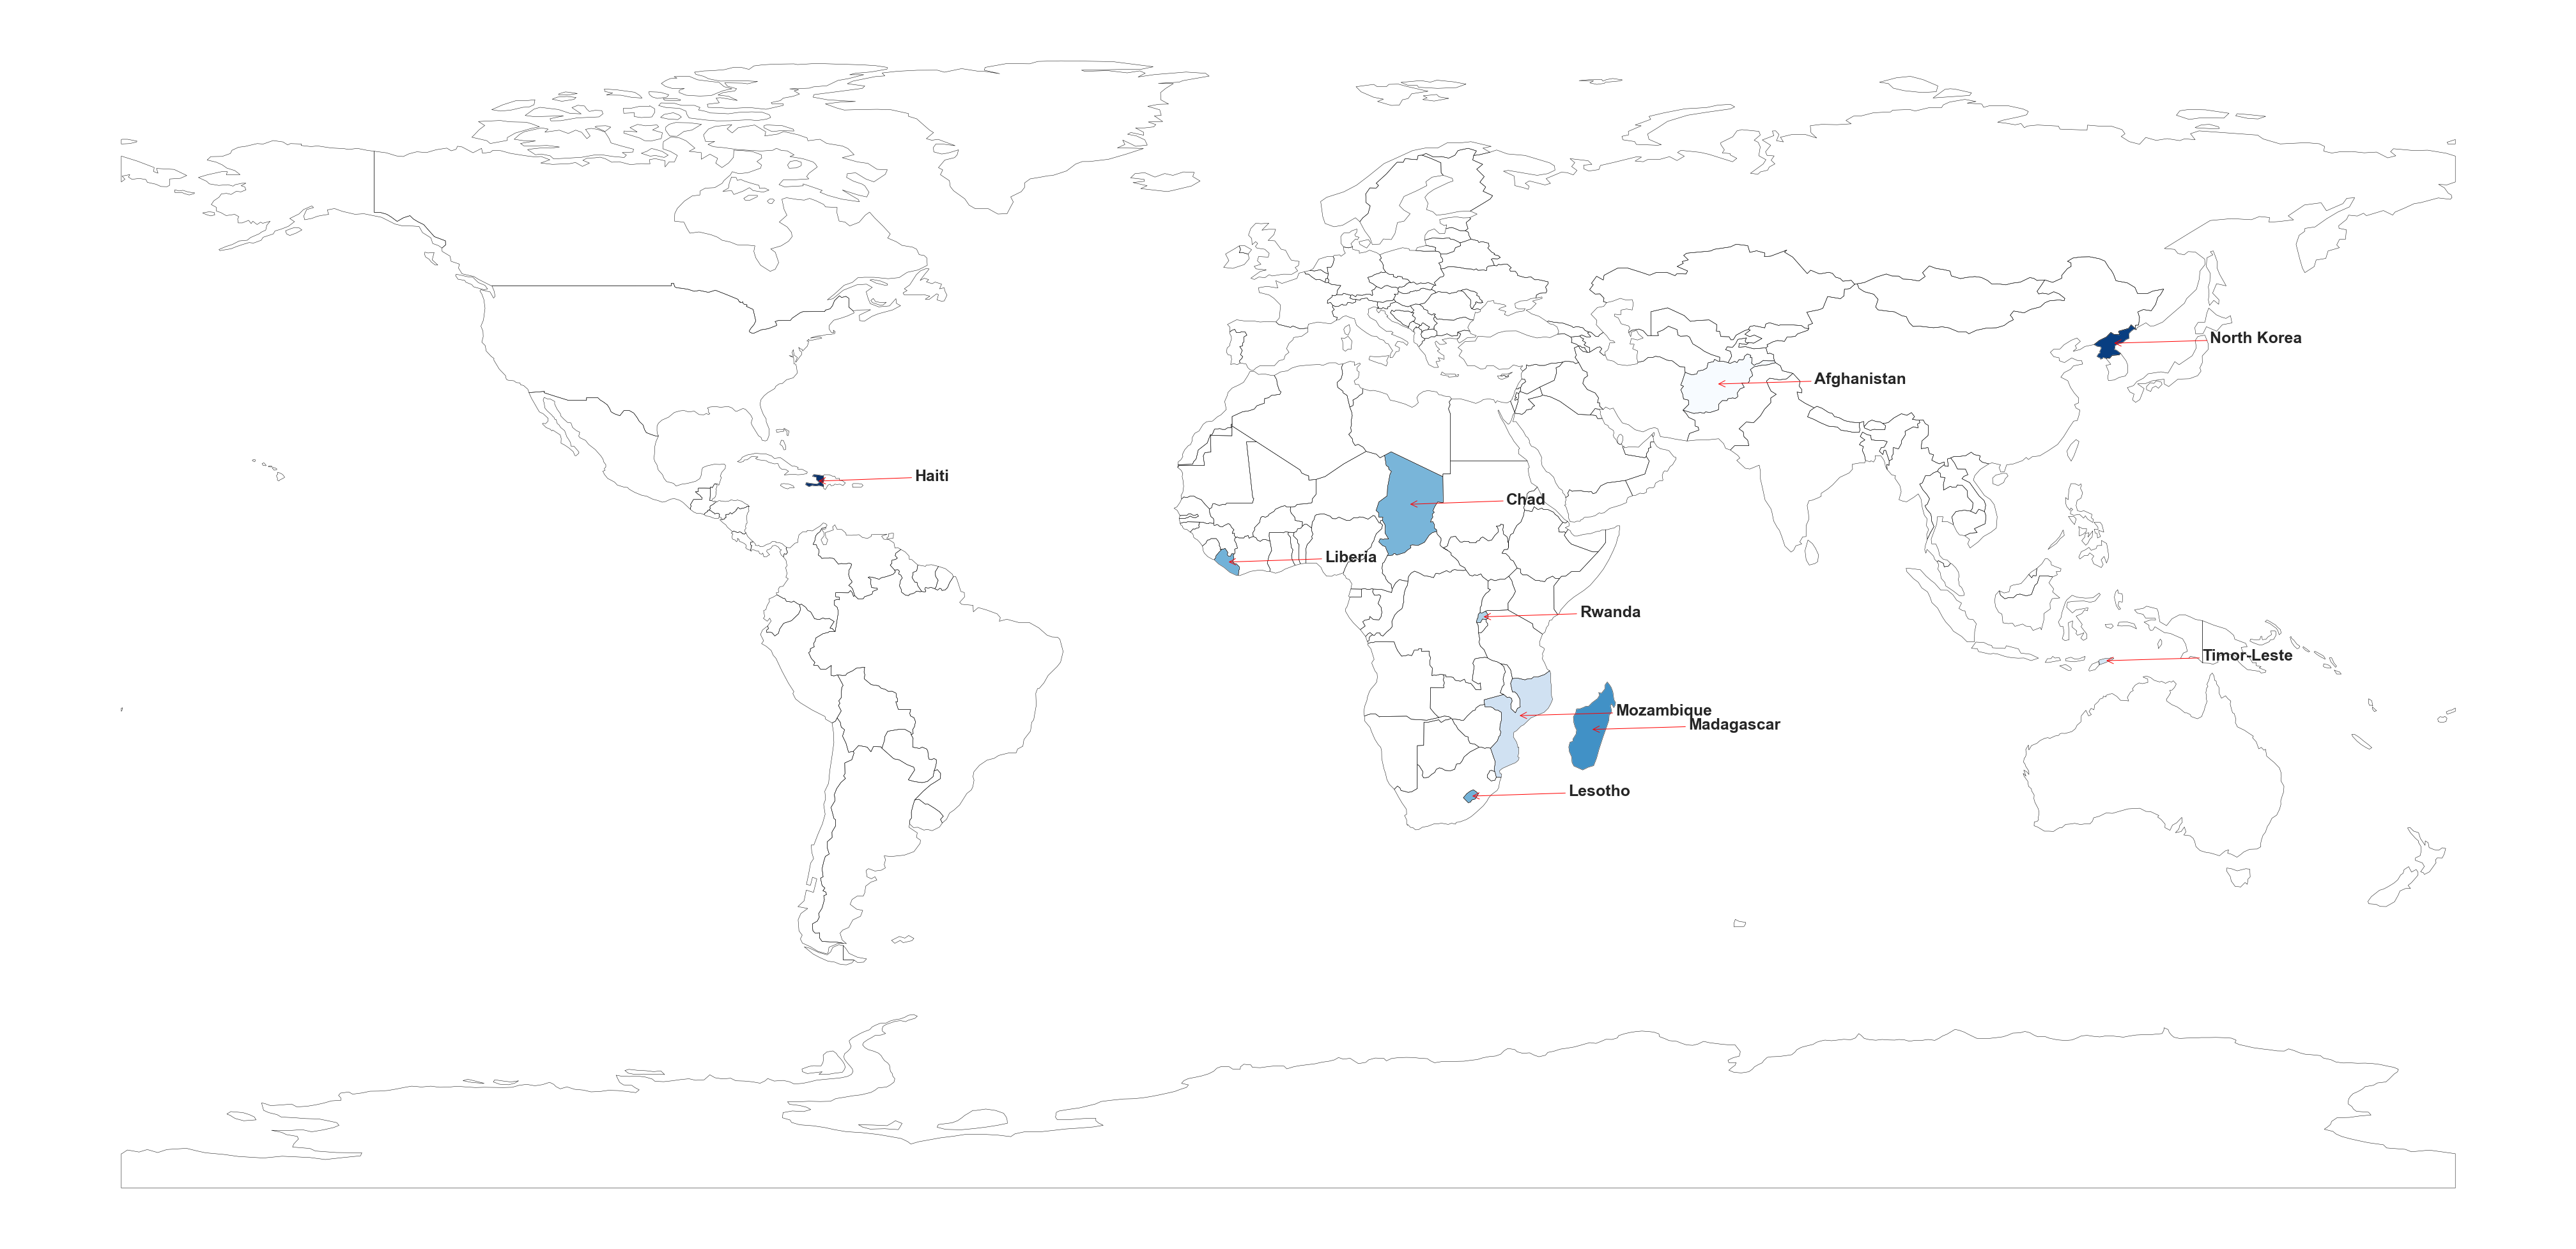

In [127]:
# Création d'une carte qui permet de visualiser où se trouvent les 10 pays où la sous-nutrition est la plus élevée

merged = carte_monde.set_index('name').join(df_10_pires_pays.set_index('Zone'))

fig, ax = plt.subplots(1, 1, figsize=(72, 48))

merged.plot(column='en_pourcentage_de_la_population', ax=ax, legend=False, cmap='Blues')

carte_monde.boundary.plot(ax=ax, color='black', linewidth=0.5)

noms_pays = df_10_pires_pays['Zone'].tolist()

for x, y, label in zip(carte_monde.geometry.centroid.x, carte_monde.geometry.centroid.y, carte_monde['name']):
    if label in noms_pays:
        ax.annotate(label, xy=(x, y), xytext=(x + 15, y), fontsize=25,
                arrowprops=dict(facecolor='black', arrowstyle='->', color='red'))
ax.set_xticks([])
ax.set_yticks([])
plt.box()
plt.show()